In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
x_train /= 255
x_test /= 255

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [12]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 71s 37ms/step - loss: 0.2007 - accuracy: 0.9393: 54s - loss: 0.3208 - accuracy: 0.90 - ETA: 54s - l - 
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0819 - accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0579 - accuracy: 0.98160s - loss:
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0417 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0338 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0289 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0232 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0206 - accuracy: 0.99312s - loss: 0 - ETA: 0s - los
Epoch 9/10
1875/1875 [==============================] - 66s 35ms/step - los

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0767 - accuracy: 0.9827


[0.07669855654239655, 0.982699990272522]

In [14]:
y_predict = model.predict(x_test)

In [15]:
y_predict

array([[1.5298176e-14, 5.5609414e-14, 6.4774800e-12, ..., 1.0000000e+00,
        4.1222082e-12, 3.4326673e-11],
       [1.4050920e-12, 3.4821699e-08, 1.0000000e+00, ..., 3.7672643e-19,
        1.1953570e-13, 1.9225207e-22],
       [2.9658241e-11, 9.9999666e-01, 5.9948051e-09, ..., 3.1346765e-06,
        8.0629547e-09, 4.5866559e-09],
       ...,
       [5.7990654e-25, 4.5285414e-13, 3.3438193e-18, ..., 1.4724922e-09,
        4.3445689e-13, 6.8565864e-10],
       [4.2258470e-14, 7.1459714e-15, 3.4093014e-18, ..., 8.1382529e-17,
        1.5346568e-07, 2.1910277e-14],
       [1.0922776e-09, 6.6507964e-15, 3.5647023e-09, ..., 8.6840692e-16,
        1.1603207e-11, 1.0879698e-12]], dtype=float32)

In [16]:
import numpy as np

In [17]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test, axis=0)

In [18]:
y_test_digit_eval

7

In [19]:
y_predicts[5]

1

In [20]:
#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

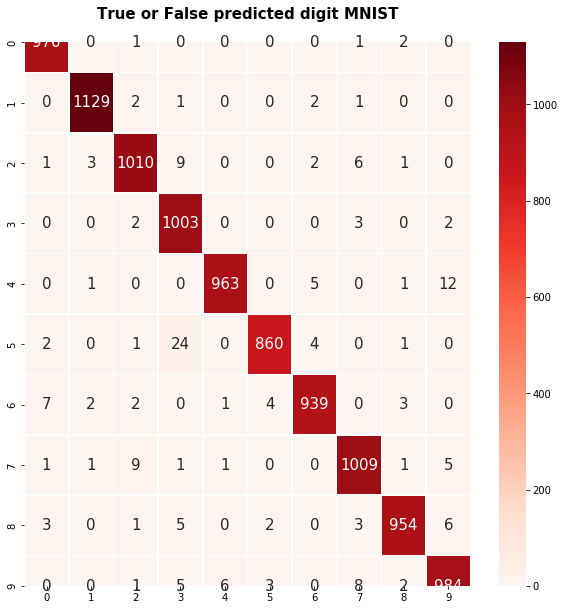

In [21]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="Reds")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.96      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



6


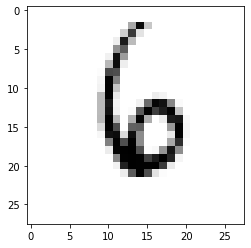

In [23]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())